HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees over time. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture and motivation systems that help the organization retain top employees.

AIM: In this dataset we will try to analyze the factors affecting the attrition and create a best model for predicting the attrition.

In [482]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [483]:
#loading the dataset
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
#lets see insights of the data sets
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [484]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [485]:
#checking the data types
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [486]:
#checking the column values
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [487]:
#Checking the shape
df.shape

(1470, 35)

In [488]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [489]:
#cheking the object type and integer type datatype
(df.dtypes==object).value_counts()

False    26
True      9
dtype: int64

In [490]:
#Observation
#There are total 1470 rows and 35 columns
#Out of 35 columns 9 are object type and 26 are integer type

# Summary statistics

In [491]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [492]:
#All the coulmns have 1470 values. so thier is no null value.
#traget variable has 2 unique values
#where as attributes like BusinessTravel, Department, EducationField have 3, 3, 6 respectivly



In [493]:
df["Attrition"].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

In [494]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["Attrition"]=le.fit_transform(df["Attrition"])

In [495]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [496]:
#Checking the columns with null values
df.columns[df.isna().any()].tolist()

[]

In [424]:
#Finding cheking the low corelated coulmn
df.corr()


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


<AxesSubplot:>

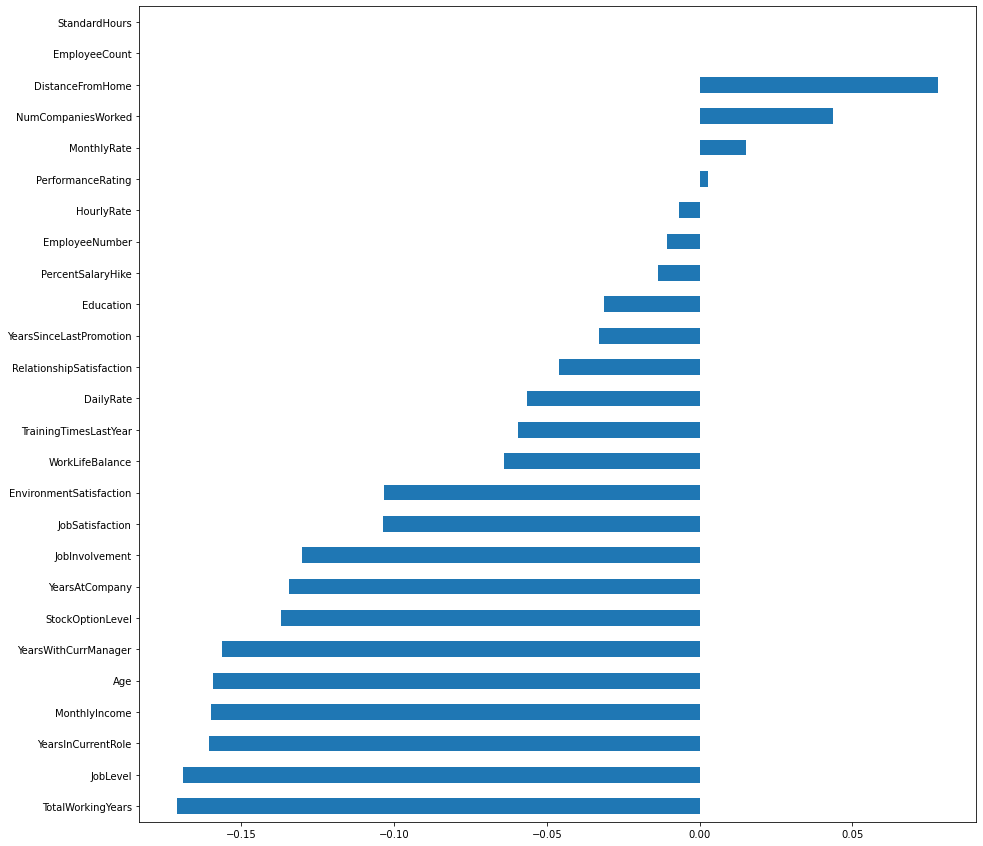

In [425]:
#checking the correlation
plt.figure(figsize=(15,15))

df.corr()["Attrition"].sort_values().drop("Attrition").plot(kind='barh')

In [426]:
# We need to drop the least correlated columns for better analysis
df.drop(labels=["StandardHours","EmployeeCount"], axis=1,inplace=True)

In [427]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [428]:
df.columns
#cheking the columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [429]:
df.dtypes
#all dtypes are converted to int

Age                          int64
Attrition                    int32
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance     

# EDA

# Univariant analysis

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


maximum employess are of age      TotalWorkingYears
10                202
minimum employess are of age      TotalWorkingYears
38                  1




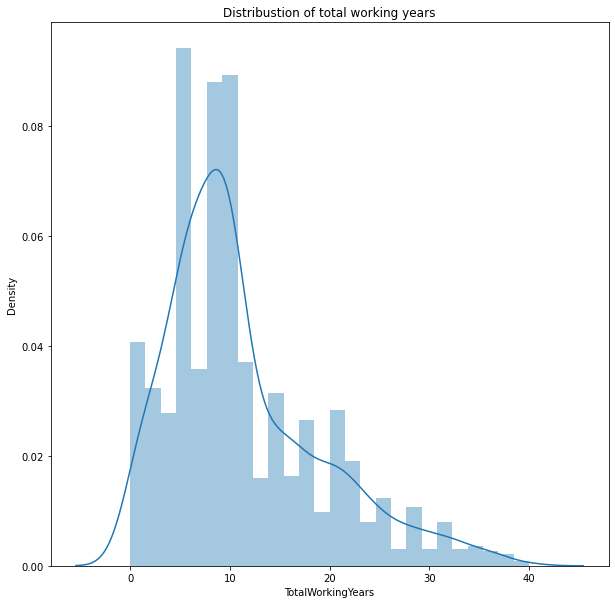

In [430]:
#lets start with the total working years as it is one of the highly corelated
plt.figure(figsize=(10,10))
sns.distplot(df["TotalWorkingYears"])
plt.title("Distribustion of total working years")
print(df["TotalWorkingYears"].describe())
A=pd.DataFrame(df["TotalWorkingYears"].value_counts())

print("\n")
print("maximum employess are of age ",A.iloc[:1,:])
print("minimum employess are of age ",A.iloc[-1:,:])
print("\n")
plt.show()

In [431]:
#grapgh shows that 50% of the employess have with in 10 years of work experince in this company
#employees with 10 years of experince in the company are most(202 employees) and 38 year of experince is least(1 employee)

count    1470.000000
mean        2.063946
std         1.106940
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: JobLevel, dtype: float64


maximum employess are of JobLevel     JobLevel
1       543
minimum employess are of JobLevel     JobLevel
5        69




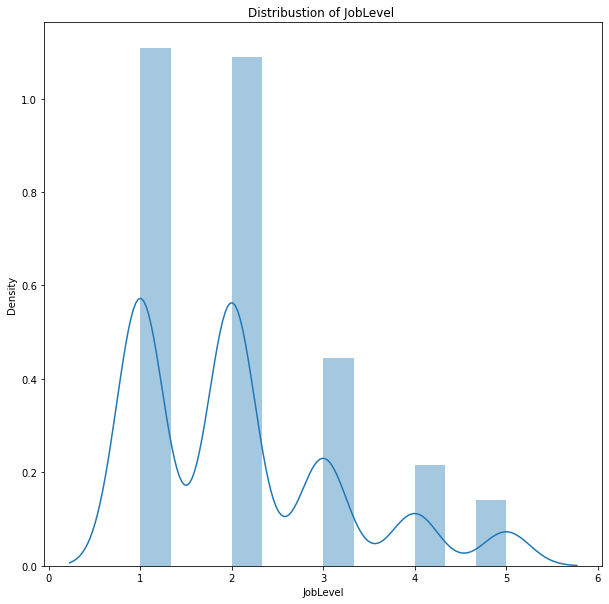

In [432]:
#analysis of job level of an employee
plt.figure(figsize=(10,10))
sns.distplot(df["JobLevel"])
plt.title("Distribustion of JobLevel ")
print(df["JobLevel"].describe())
A=pd.DataFrame(df["JobLevel"].value_counts())

print("\n")
print("maximum employess are of JobLevel ",A.iloc[:1,:])
print("minimum employess are of JobLevel ",A.iloc[-1:,:])
print("\n")
plt.show()

In [433]:
#grapgh shows that 50% of the employess are in lower job level in this company
#employees with job level 1  in the company are most(543 employees) and 5 year of experince is least(69 employee)

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64


average salary of an employee in this company is: 6502.931292517007
Maximum salary in this company is  19999 where as minimum is  1009
About 50% of the employees are getting salary less than 5000rs


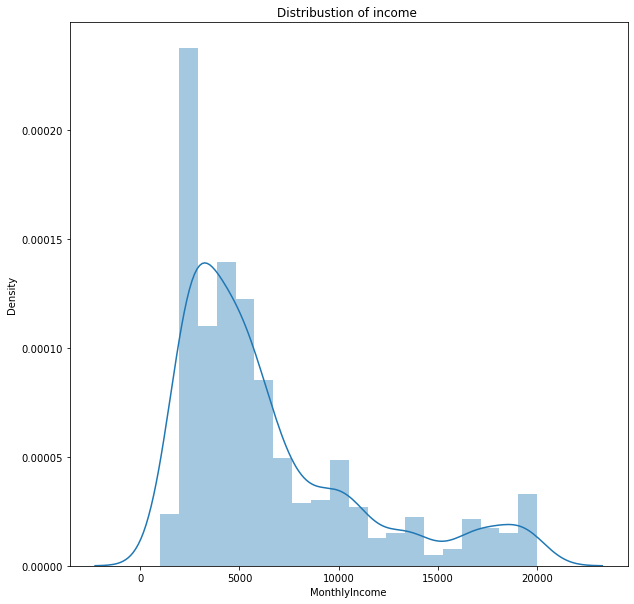

In [434]:
#analysis of Monthly Income of an employee
plt.figure(figsize=(10,10))
sns.distplot(df["MonthlyIncome"])
plt.title("Distribustion of income ")
print(df["MonthlyIncome"].describe())
A=pd.DataFrame(df["MonthlyIncome"].value_counts())
print("\n")
print("average salary of an employee in this company is:", df["MonthlyIncome"].mean())
print("Maximum salary in this company is ",df["MonthlyIncome"].max(),"where as minimum is ",df["MonthlyIncome"].min())
print("About 50% of the employees are getting salary less than 5000rs")

,OverTime
No,1054
Yes,416


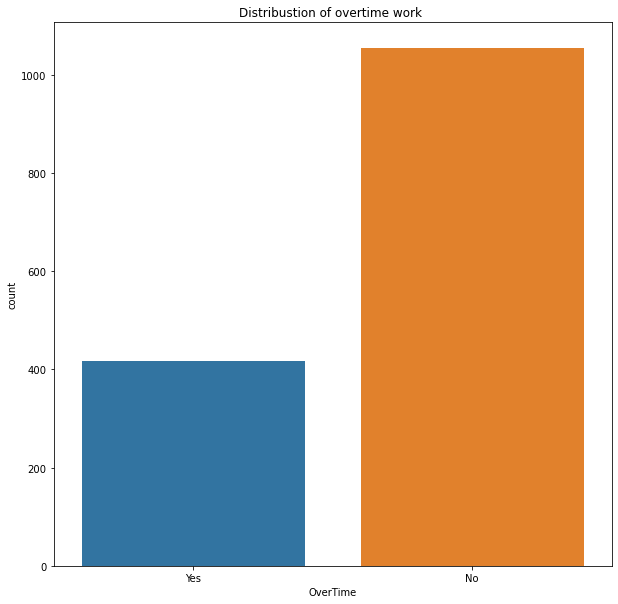

In [435]:
#analysis of overtime work done by employee
plt.figure(figsize=(10,10))
sns.countplot(df["OverTime"])
plt.title("Distribustion of overtime work ")
pd.DataFrame(df["OverTime"].value_counts())

,MaritalStatus
Married,673
Single,470
Divorced,327


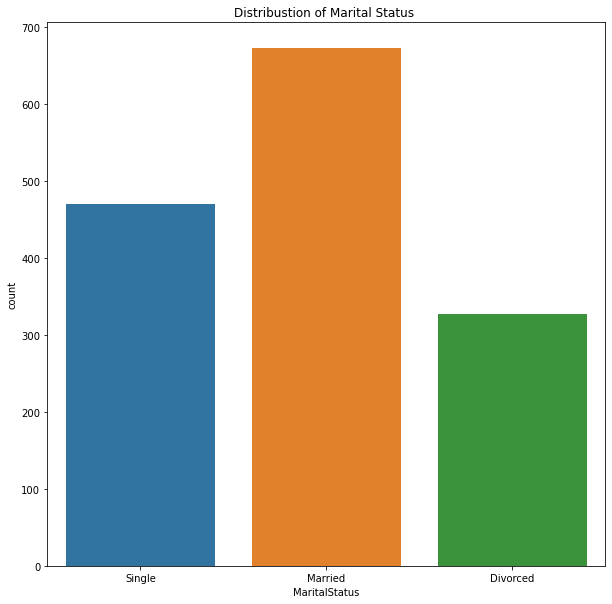

In [436]:
#analysis of overtime work done by employee
plt.figure(figsize=(10,10))
sns.countplot(df["MaritalStatus"])
plt.title("Distribustion of Marital Status ")
pd.DataFrame(df["MaritalStatus"].value_counts())


In [437]:
#From the grapgh we can see that 673 employees are not married(nearly 50%) and 470 is married, 327 is divorced 

count    1470.000000
mean        9.192517
std         8.106864
min         1.000000
25%         2.000000
50%         7.000000
75%        14.000000
max        29.000000
Name: DistanceFromHome, dtype: float64


maximum employess are  coming from     DistanceFromHome
2               211
minimum employess are comming from      DistanceFromHome
27                12




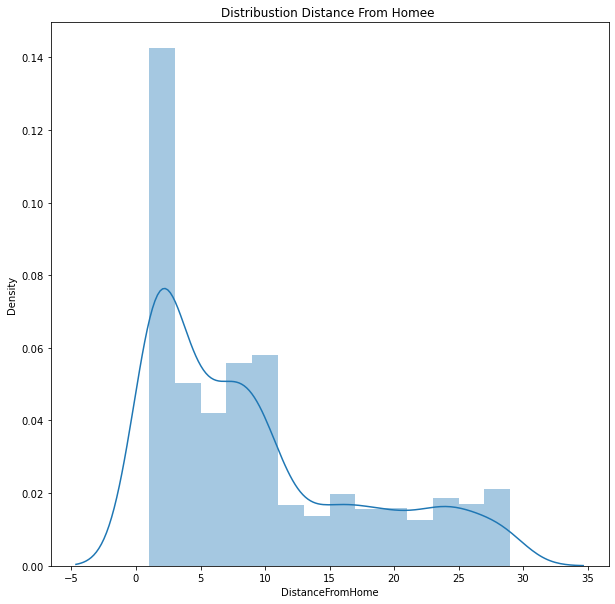

In [438]:
#analysis of Monthly Income of an employee
plt.figure(figsize=(10,10))
sns.distplot(df["DistanceFromHome"])
plt.title("Distribustion Distance From Homee ")
print(df["DistanceFromHome"].describe())
A=pd.DataFrame(df["DistanceFromHome"].value_counts())
A=pd.DataFrame(df["DistanceFromHome"].value_counts())

print("\n")
print("maximum employess are  coming from ",A.iloc[:1,:])
print("minimum employess are comming from ",A.iloc[-1:,:])
print("\n")
plt.show()

In [439]:
#more than 60% of employees are coming from with in 10kmn of office 

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>],
       [<AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>],
       [<AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>,
        <AxesSubplot:title={'center'

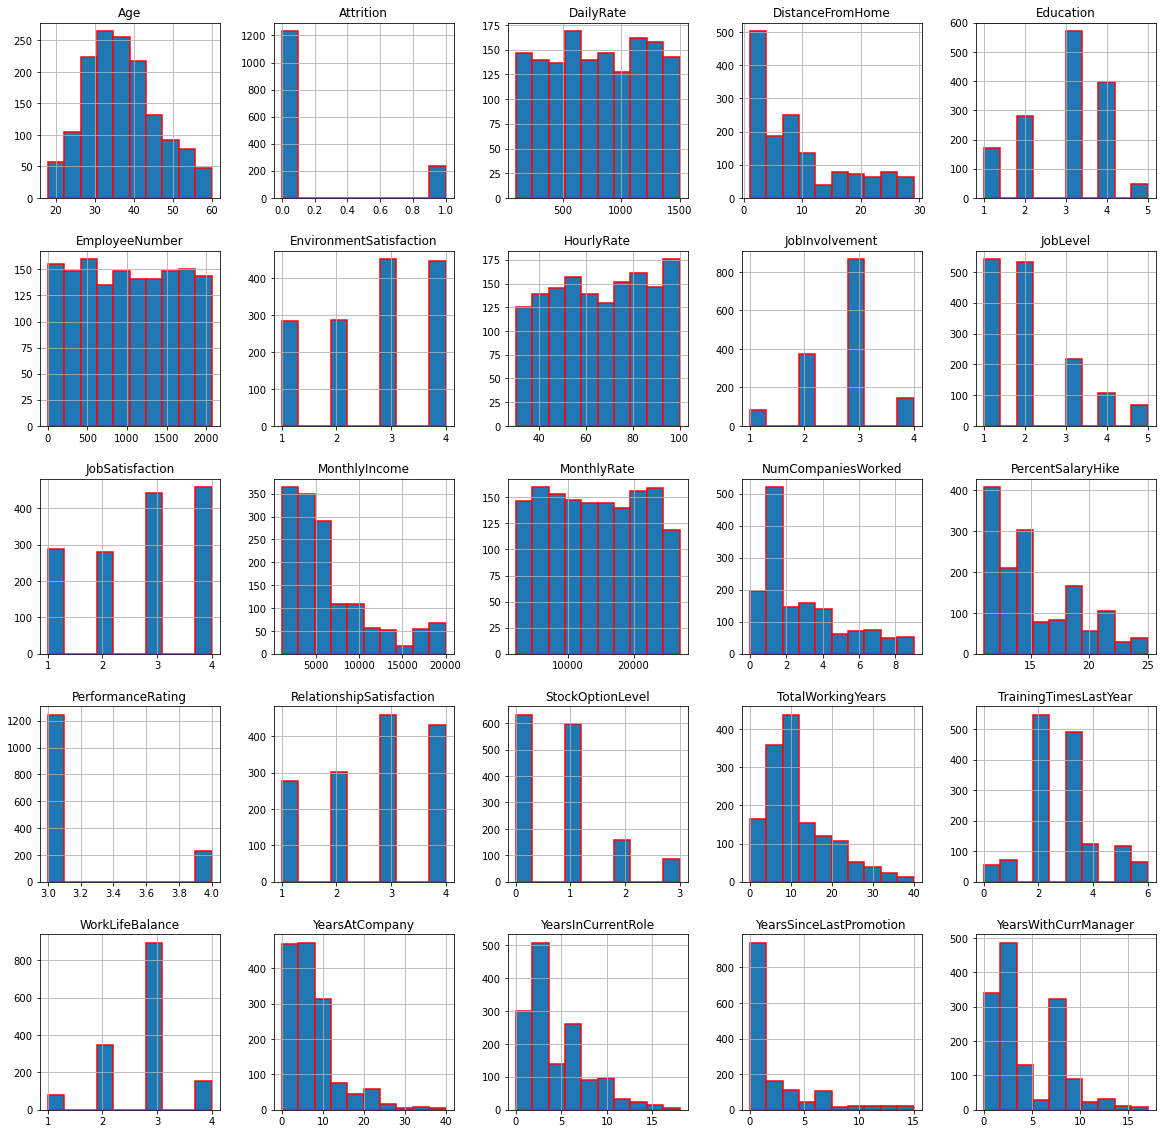

In [440]:
#checking the all the coulumns
df.hist(edgecolor="red",linewidth=1.5,figsize=(20,20))

In [441]:
#Total Observation
#Age:Age is normally distributed
#Attrition: about 16% of the employees leave the company every year
#Department: R&D has most number of employees where as sales has 2nd most
#Education: most peple have education level 3 and eductaion level 5 is least
#Gender: male to female ratio in the company is 4: 3
#Numcompaniesworked: About 50% of the employes worked for less than 2 comapanies
#Yearsincurrentrole: Nearly 50% of the employes are in same role for upto 5 years
#only about 70% of employees are getting promated every year


# Bi-variant analysis

In [442]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


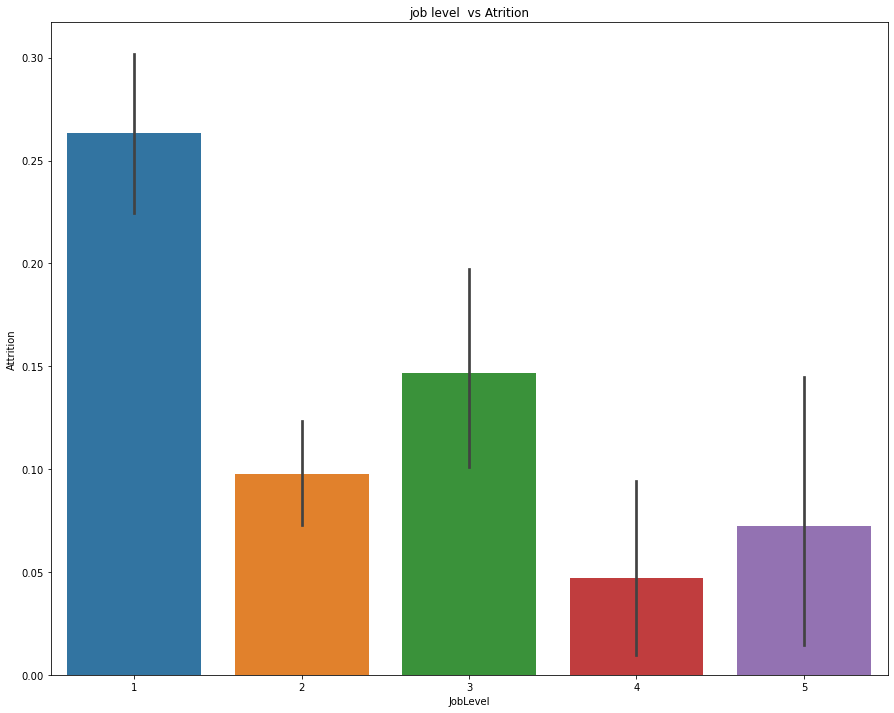

In [443]:
#Analysis of joblevel impact on attrition
plt.figure(figsize=(15,12))
plt.title("job level  vs Atrition")
plt.xlabel("JobLevel")
plt.ylabel("Atrition")
sns.barplot(df["JobLevel"],df["Attrition"])
plt.show()

In [444]:
#posibility attrition in employees having level 1 job is more where as level 4 is less


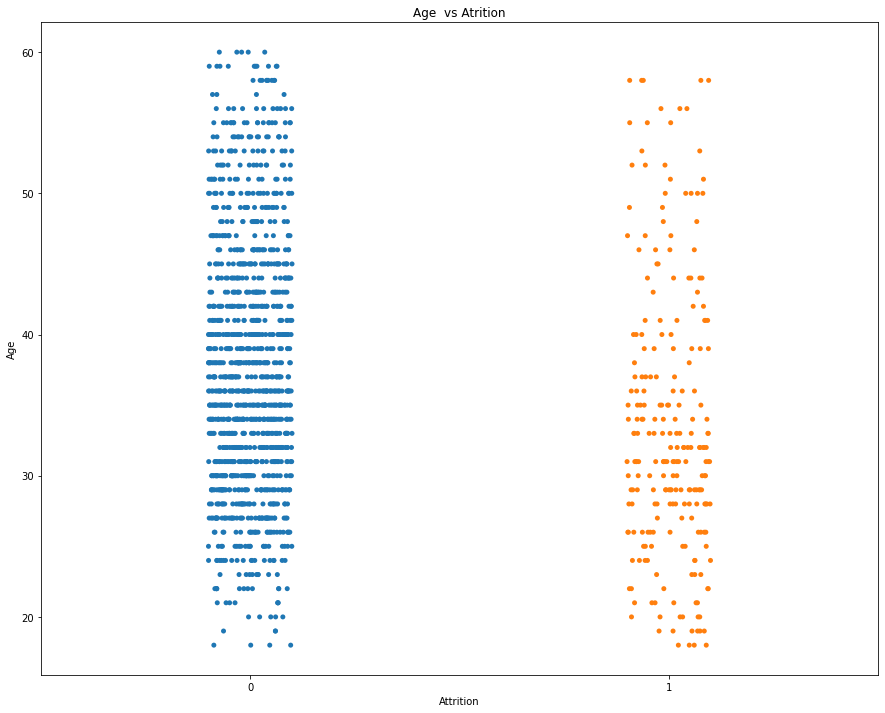

In [445]:
#Analysis of joblevel impact on attrition
plt.figure(figsize=(15,12))
plt.title("Age  vs Atrition")
plt.xlabel("Atrition")
plt.ylabel("Age")
sns.stripplot(df["Attrition"], df["Age"])
plt.show()

In [446]:
#From the plot we can see most of the people who leave the company are below the age 40

In [447]:
#So we can see that most of the employee left the companies are from sale department 

<Figure size 1080x864 with 0 Axes>

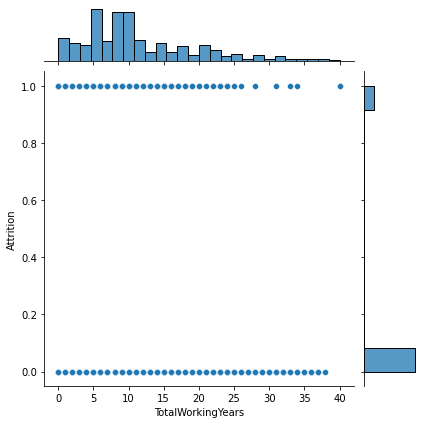

,Attrition
TotalWorkingYears,
0,5
1,40
2,9
3,9
4,12
5,16
6,22
7,18
8,16


In [448]:
#Analysis of Total Working Years impact on attrition
plt.figure(figsize=(15,12))
sns.jointplot(y=df["Attrition"],x=df["TotalWorkingYears"],data=df,kind="scatter")
plt.show()
pd.DataFrame(df.groupby("TotalWorkingYears").sum()["Attrition"])


In [449]:
#Most of the employess who left the job are below 20 years of experince
#people with 1 years of experince leave the company most(40 people)

# Multivariant analysis

In [450]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


Gender
Female     87
Male      150
Name: Attrition, dtype: int32

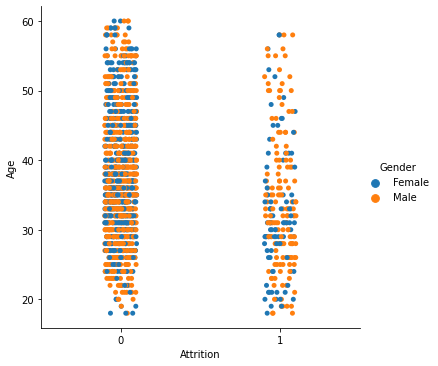

In [451]:
#Analysis of attrition and age for different genders
sns.catplot(x="Attrition",y="Age", hue="Gender",data=df)
df.groupby("Gender").sum()["Attrition"]


In [452]:
#both male and female leave the comapny and most of them are between 28 to 32 years old
#out of total attritions 87 are female(about 36%) and 150 are males(about 63%)

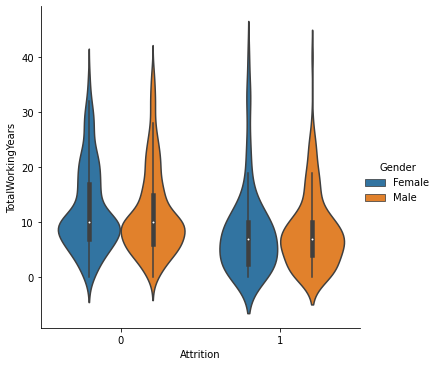

In [453]:
#Analysis of attrition and TotalWorkingYears for different genders
sns.catplot(x="Attrition",y="TotalWorkingYears", hue="Gender",data=df,kind="violin")


In [454]:
#chances number of male employees leaving the company after 30 years is less campared to female


OverTime
No     110
Yes    127
Name: Attrition, dtype: int32

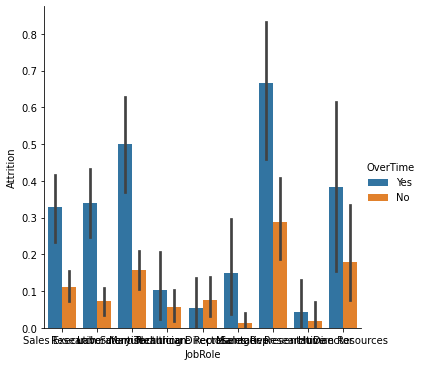

In [455]:
#Analysis of attrition and age for over time
sns.catplot(y="Attrition",x="JobRole", hue="OverTime",data=df,kind="bar")
df.groupby("OverTime").sum()["Attrition"]

OverTime
No     110
Yes    127
Name: Attrition, dtype: int32

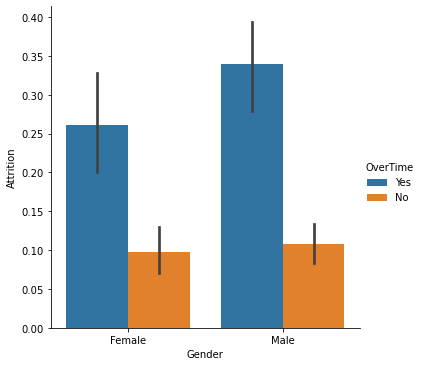

In [456]:
#Analysis of attrition and age for over time
sns.catplot(y="Attrition",x="Gender", hue="OverTime",data=df,kind="bar")
df.groupby("OverTime").sum()["Attrition"]

In [457]:
#Males have more chances of leaving the comapany if he is working over time

In [458]:
#Only few columns have outliers lets check the corelation of those columns
df.corr()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [459]:
#skew ness is present in some of the columns which is need to be removed

# DATA cleaning,Transfomation, Feature engineering

In [460]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


In [461]:
#lets create some new features
df["average_age_per_attrition"]=df['Age'].groupby(df['Attrition']).transform('mean')
df["average_age_per_Department"]=df['Age'].groupby(df['Department']).transform('mean')
df["average_age_per_education"]=df['Age'].groupby(df['EducationField']).transform('mean')
df["Number of attrition per department"]=df["Attrition"].groupby(df['Department']).transform('sum')
df["Number of attrition per EducationField"]=df["Attrition"].groupby(df['EducationField']).transform('sum')
df["Number of attrition per TotalWorkingYears"]=df["Attrition"].groupby(df['TotalWorkingYears']).transform('sum')
df["Number of attrition per JobSatisfaction"]=df["Attrition"].groupby(df['JobSatisfaction']).transform('sum')
df["Number of attrition per YearsInCurrentRole"]=df["Attrition"].groupby(df['YearsInCurrentRole']).transform('sum')
df["Number of attrition per WorkLifeBalance"]=df["Attrition"].groupby(df['WorkLifeBalance']).transform('sum')
df["Avg MonthlyIncome per attrition "]=df["MonthlyIncome"].groupby(df["Attrition"]).transform('mean')
df["Avg MonthlyIncome per department"]=df["MonthlyIncome"].groupby(df['Department']).transform('mean')
df["Avg MonthlyIncome per EducationField"]=df["MonthlyIncome"].groupby(df['EducationField']).transform('mean')
df["Avg MonthlyIncome TotalWorkingYears"]=df["MonthlyIncome"].groupby(df['TotalWorkingYears']).transform('mean')
df["years with previous managers"]=df["YearsAtCompany"]-df["YearsWithCurrManager"]
df["years with previous company"]=df["TotalWorkingYears"]-df["YearsAtCompany"]
df["average_age_per_attrition"]=df['Age'].groupby(df['Attrition']).transform('mean')
df["avg percentage hike per attrition"]=df['PercentSalaryHike'].groupby(df['Attrition']).transform('mean')
df["avg percentage hike per Department"]=df['PercentSalaryHike'].groupby(df['EducationField']).transform('mean')
df["avg percentage hike per TotalWorkingYears"]=df['PercentSalaryHike'].groupby(df['TotalWorkingYears']).transform('mean')
df["avg percentage hike per PerformanceRating"]=df['PercentSalaryHike'].groupby(df['PerformanceRating']).transform('mean')

In [462]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,Avg MonthlyIncome per attrition,Avg MonthlyIncome per department,Avg MonthlyIncome per EducationField,Avg MonthlyIncome TotalWorkingYears,years with previous managers,years with previous company,avg percentage hike per attrition,avg percentage hike per Department,avg percentage hike per TotalWorkingYears,avg percentage hike per PerformanceRating
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,4787.092827,6959.172646,6463.288779,4209.252427,1,2,15.097046,15.254125,15.155340,14.003215
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,6832.739659,6281.252862,6463.288779,6019.767327,3,0,15.231144,15.254125,15.178218,21.849558
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,4787.092827,6281.252862,6071.548780,4171.308642,0,7,15.097046,15.500000,15.493827,14.003215
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,6832.739659,6281.252862,6463.288779,4209.252427,8,0,15.231144,15.254125,15.155340,14.003215
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,6832.739659,6281.252862,6510.036638,4215.256000,0,4,15.231144,15.366379,14.784000,14.003215


In [463]:
#lets encode the catagorical variable
df.dtypes

Age                                             int64
Attrition                                       int32
BusinessTravel                                 object
DailyRate                                       int64
Department                                     object
DistanceFromHome                                int64
Education                                       int64
EducationField                                 object
EmployeeNumber                                  int64
EnvironmentSatisfaction                         int64
Gender                                         object
HourlyRate                                      int64
JobInvolvement                                  int64
JobLevel                                        int64
JobRole                                        object
JobSatisfaction                                 int64
MaritalStatus                                  object
MonthlyIncome                                   int64
MonthlyRate                 

In [498]:
#variables with 2 catagoris we can substitute with  0 and 1

df["Gender"]=df["Gender"].map({"Female":0,"Male":1})
df["OverTime"]=df["OverTime"].map({"No":0,"Yes":1})

In [499]:
df=pd.get_dummies(df, prefix=["BusinessTravel","Department","EducationField","JobRole","MaritalStatus"], prefix_sep='_', dummy_na=False, columns=["BusinessTravel","Department","EducationField","JobRole","MaritalStatus"], sparse=False, drop_first=True, dtype=None)


In [500]:
df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,...,0,1,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,...,0,0,0,1,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,...,0,0,0,0,0,0,1,0,1,0


In [501]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRo

In [502]:
df.drop(labels=["Over18","EmployeeNumber"],axis=1,inplace=True)

In [503]:
#atrributes and tartget variables
x=df.drop(labels="Attrition",axis=1)
y=df["Attrition"]

In [504]:
#scaling the values
from sklearn.preprocessing import MinMaxScaler
sl=MinMaxScaler()
x=pd.DataFrame(sl.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.547619,0.715820,0.000000,0.25,0.0,0.333333,0.0,0.914286,0.666667,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.666667,1.0,0.442857,0.333333,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,1.000000,1.0,0.885714,0.333333,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,1.000000,0.0,0.371429,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.000000,1.0,0.142857,0.666667,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.0,0.666667,1.0,0.157143,1.000000,0.25,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,0.0,1.000000,1.0,0.171429,0.333333,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.0,0.333333,1.0,0.814286,1.000000,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.738095,0.659270,0.035714,0.50,0.0,1.000000,1.0,0.471429,0.333333,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [523]:
!pip install imblearn

from imblearn.combine import SMOTETomek
smk = SMOTETomek()
x_new, y_new = smk.fit_resample(x, y)

In [529]:
print("old size:",x.shape, "New size:",x_new.shape)

old size: (1470, 46) New size: (2466, 46)


# Model Fitting

In [530]:
#model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import RepeatedStratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [531]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.33, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        accuracyscore=accuracy_score(y_test,predict)
        if accuracyscore>max_score:
            max_score=accuracyscore
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [532]:
model_select(SVC)

Max score is 0.9078624078624079 with random state 56


In [533]:
model_select(LogisticRegression)

Max score is 0.8378378378378378 with random state 98


In [534]:
model_select(GaussianNB)

Max score is 0.6953316953316954 with random state 55


In [535]:
model_select(RandomForestClassifier)

Max score is 0.9533169533169533 with random state 61


In [536]:
model_select(KNeighborsClassifier)

Max score is 0.8316953316953317 with random state 93


In [537]:
model_select(DecisionTreeClassifier)

Max score is 0.8722358722358723 with random state 53


In [538]:
model_select(AdaBoostClassifier)

Max score is 0.9238329238329238 with random state 47


In [514]:
#From the above model training we can see RandomForestClassifier performs best(95%) at random state 61 lets proceed with these values

In [539]:
x_train,x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.33, random_state=61)
print(x_train.shape, x_test.shape)

(1652, 46) (814, 46)


In [540]:
cross_val_score(RandomForestClassifier(),x_train,y_train,cv=5).mean()

0.921913393756294

In [517]:
#CV score and accuracy score is nearly same..will go for optimization for better accuracy

In [541]:
#parameter tuning
rf= RandomForestClassifier()

parameters = {"n_estimators": [4, 5, 6, 7, 8, 9, 10, 15], 
              "criterion": ["gini", "entropy"],
              "max_features": ["auto", "sqrt", "log2"], 
              "max_depth": [2, 3, 5, 10], 
              "min_samples_split": [2, 3, 5, 10],
              "min_samples_leaf": [1, 5, 8, 10]
             }

grid_cv = GridSearchCV(rf, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train,y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_split=5,
                       n_estimators=15)

In [542]:
rg = grid_cv.best_estimator_

rg.fit(x_train, y_train)
pred_rf = rg.predict(x_test)
print("confusion matrix",confusion_matrix(y_test,pred_rf ))
print("\n")
print("classificationreport", classification_report(y_test,pred_rf))
print("accuracy score",accuracy_score(y_test,pred_rf))

confusion matrix [[382  31]
 [ 35 366]]


classificationreport               precision    recall  f1-score   support

           0       0.92      0.92      0.92       413
           1       0.92      0.91      0.92       401

    accuracy                           0.92       814
   macro avg       0.92      0.92      0.92       814
weighted avg       0.92      0.92      0.92       814

accuracy score 0.918918918918919


<AxesSubplot:>

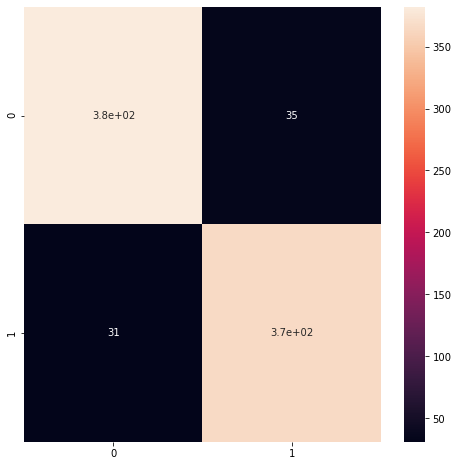

In [544]:
#confusion matrix in heat map
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(pred_rf, y_test), annot=True)

In [545]:
#area under curve and recevieng operating charecteristics

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [546]:
y_pred_prob=rg.predict_proba(x_test)[:,1]

In [548]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [549]:
print("False positive rate:", fpr)
print("\n")
print("True positive rate:", tpr)
print("\n")
print("Threshold values:", threshold)

False positive rate: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00242131
 0.00242131 0.00242131 0.00242131 0.00242131 0.00242131 0.00242131
 0.00242131 0.00242131 0.00242131 0.00484262 0.00484262 0.00726392
 0.00726392 0.01210654 0.01210654 0.01452785 0.01452785 0.01694915
 0.01694915 0.02421308 0.02421308 0.02663438 0.02663438 0.031477
 0.031477   0.031477   0.031477   0.03389831 0.03389831 0.03631961
 0.03631961 0.04358354 0.04358354 0.04600484 0.04600484 0.04842615
 0.04842615 0.05084746 0.05084746 0.05326877 0.05326877 0.05811138
 0.05811138 0.06053269 0.06053269 0.0653753  0.0653753  0.07021792
 0.07021792 0.07506053 0.07506053 0.07748184 0.07748184 0.08474576
 0.08474576 0.08716707 0.08716707 0.0968523  0.0968523  0.1283293
 0.128329

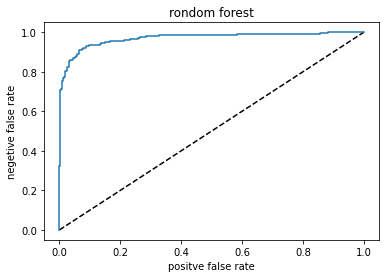

In [554]:
#AUC roc curve graphical representation
plt.plot([0,1],[0,1], "k--")
plt.plot(fpr,tpr)
plt.xlabel("positve false rate")
plt.ylabel("negetive false rate")
plt.title("rondom forest")
plt.show()

In [551]:
#acu_score 
acu_score=roc_auc_score(y_test,y_pred_prob)
acu_score

0.9701895382608854

In [552]:
#Graph shows accuracy with which values predicted by model campared to actual values of y
#now we can find the predict the attrition based on the attribute values with about 91% accuracy
#saving the model

In [553]:
import pickle
filename="HR_analytics.pkl"
pickle.dump(lg,open(filename,"wb"))